**Problem Statement**

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

Hint:

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

from sklearn import datasets

In [121]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [122]:
# load iris dataset
df = datasets.load_iris()

iris= pd.DataFrame(np.column_stack((df.data, df.target)), columns = df.feature_names+['target'])
iris.target = iris['target'].map({
    0 : 'setosa',
    1 : 'versicolor',
    2 : 'virginica'   
})
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = iris.loc[:, columns].values
y = iris.loc[:,['target']].values


In [123]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC_1', 'PC_2', 'PC_3'])
pdf = pd.concat([principalDf,iris[['target']]], axis = 1)
pdf

,PC_1,PC_2,PC_3,target
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


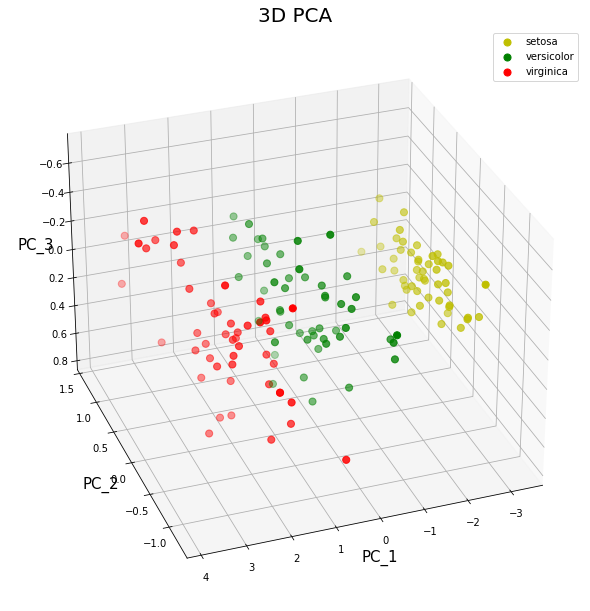

In [129]:

# Create the figure
fig = plt.figure(figsize = (10,8))

ax = Axes3D(fig, elev=-150, azim=110)
ax.set_xlabel('PC_1', fontsize = 15)
ax.set_ylabel('PC_2', fontsize = 15)
ax.set_zlabel('PC_3', fontsize = 15)
ax.set_title('3D PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['y', 'g', 'r']
for target, color in zip(targets,colors):
    isTarget = pdf['target'] == target
    ax.scatter(pdf.loc[isTarget, 'PC_1']
               , pdf.loc[isTarget, 'PC_2']
               , pdf.loc[isTarget, 'PC_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()